Part 1: On the descent direction
Gradient dJ:
Matrix([[3*x1**2], [2*x2 + 2]])

Gradient at (1,1):
Matrix([[3], [4]])

Inner product with direction vector:
3*d1 + 4*d2


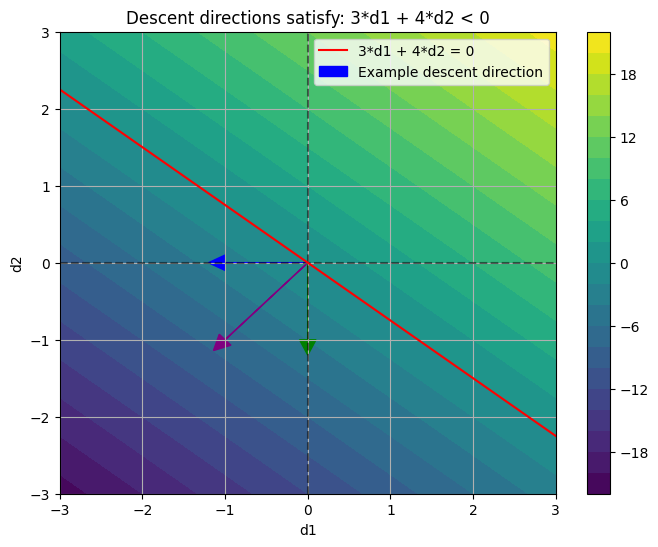


Gradient at (0,-1):
Matrix([[0], [0]])
Inner product with direction vector:
0
Since this is 0 regardless of direction, no descent direction exists at (0,-1)

Part 2: On the optimal step-size
Gradient dJ:
Matrix([[1.0*x1], [9.0*x2]])

Derivative of J with respect to alpha:
-1.0*x1*(-1.0*alpha*x1 + x1) - 729.0*x2*(-alpha*x2 + 0.111111111111111*x2)

Derivative of J with respect to alpha at (5,1):
754.0*alpha - 106.0
Optimal alpha = 0.14058355437665782
Optimal alpha from fsolve = 0.14058355437665782

Part 3: On the Newton method
Gradient dJ:
Matrix([[1.0*x1], [9.0*x2]])
Hessian H:
Matrix([[1.00000000000000, 0], [0, 9.00000000000000]])

Newton direction d_0:
Matrix([[-1.0*x1], [-1.0*x2]])

Updated x:
Matrix([[0], [0]])
In this quadratic case, one iteration reaches the optimal solution.

Part 4: Newton method with a new function
Gradient dJ:
Matrix([[4*x1**3], [4*x2]])
Hessian H:
Matrix([[12*x1**2, 0], [0, 4]])

Newton direction d_0:
Matrix([[-x1/3], [-x2]])

Updated x:
Matrix([[2*x1/3], [0

In [1]:
# Worksheet 4 Unconstrained Optimization
# Python equivalent of MATLAB code

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sympy import symbols, diff, simplify, Matrix, Eq, solve

# Clear all
plt.close('all')

# On the descent direction
print("Part 1: On the descent direction")
x1, x2 = symbols('x1 x2')
J = x1**3 + x2**2 + 2*x2
dJdx1 = diff(J, x1)
dJdx2 = diff(J, x2)
dJ = Matrix([dJdx1, dJdx2])
print("Gradient dJ:")
print(dJ)

# Substitute with Point (1,1)
A = dJ.subs({x1: 1, x2: 1})
print("\nGradient at (1,1):")
print(A)

# Create vector of possible descent directions
d1, d2 = symbols('d1 d2', real=True)
dir_expr = A.dot(Matrix([d1, d2]))
print("\nInner product with direction vector:")
print(dir_expr)

# Visualize direction constraints
def plot_descent_directions():
    fig, ax = plt.subplots(figsize=(8, 6))

    d1_vals = np.linspace(-3, 3, 100)
    d2_vals = np.linspace(-3, 3, 100)
    D1, D2 = np.meshgrid(d1_vals, d2_vals)

    # Evaluate 3*d1 + 4*d2
    Z = 3*D1 + 4*D2

    contour = ax.contourf(D1, D2, Z, 20, cmap='viridis')
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)

    # Draw the line 3*d1 + 4*d2 = 0
    d1_line = np.linspace(-3, 3, 100)
    d2_line = -3*d1_line/4
    ax.plot(d1_line, d2_line, 'r-', label='3*d1 + 4*d2 = 0')

    # Draw some example descent directions
    ax.arrow(0, 0, -1, 0, head_width=0.2, head_length=0.2, fc='blue', ec='blue', label='Example descent direction')
    ax.arrow(0, 0, 0, -1, head_width=0.2, head_length=0.2, fc='green', ec='green')
    ax.arrow(0, 0, -1, -1, head_width=0.2, head_length=0.2, fc='purple', ec='purple')

    ax.set_xlabel('d1')
    ax.set_ylabel('d2')
    ax.set_title('Descent directions satisfy: 3*d1 + 4*d2 < 0')
    ax.grid(True)
    ax.legend()
    fig.colorbar(contour, ax=ax)
    plt.show()

plot_descent_directions()

# Substitute with Point (0,-1)
A = dJ.subs({x1: 0, x2: -1})
print("\nGradient at (0,-1):")
print(A)

dir_expr = A.dot(Matrix([d1, d2]))
print("Inner product with direction vector:")
print(dir_expr)
print("Since this is 0 regardless of direction, no descent direction exists at (0,-1)")

# On the optimal step-size
print("\nPart 2: On the optimal step-size")
x1, x2 = symbols('x1 x2')
J = 0.5*x1**2 + 4.5*x2**2
dJdx1 = diff(J, x1)
dJdx2 = diff(J, x2)
dJ = simplify(Matrix([dJdx1, dJdx2]))
print("Gradient dJ:")
print(dJ)

alpha = symbols('alpha', real=True)
d = -dJ
x = Matrix([x1, x2])
newx = x + alpha*d
Jnew = J.subs({x1: newx[0], x2: newx[1]})
dJda = diff(Jnew, alpha)
print("\nDerivative of J with respect to alpha:")
print(dJda)

# Substitute with [5,1]
A = dJda.subs({x1: 5, x2: 1})
print("\nDerivative of J with respect to alpha at (5,1):")
print(A)

# Solve for optimal alpha
alpha_star = float(solve(A, alpha)[0])
print(f"Optimal alpha = {alpha_star}")

# Verify with scipy.optimize.fsolve
def myfun(x):
    return 754*x - 106

x_star = fsolve(myfun, 0.1)[0]
print(f"Optimal alpha from fsolve = {x_star}")

# On the Newton method
print("\nPart 3: On the Newton method")
print("Gradient dJ:")
print(dJ)

Hdx1 = diff(dJ, x1)
Hdx2 = diff(dJ, x2)
H = Matrix.hstack(Hdx1, Hdx2)
print("Hessian H:")
print(H)

# Newton direction
d_0 = -H.inv() * dJ
print("\nNewton direction d_0:")
print(d_0)

xnew = x + d_0
print("\nUpdated x:")
print(xnew)
print("In this quadratic case, one iteration reaches the optimal solution.")

# Same question with a new function
print("\nPart 4: Newton method with a new function")
x1, x2 = symbols('x1 x2')
J = x1**4 + 2*x2**2
dJdx1 = diff(J, x1)
dJdx2 = diff(J, x2)
dJ = simplify(Matrix([dJdx1, dJdx2]))
print("Gradient dJ:")
print(dJ)

Hdx1 = diff(dJ, x1)
Hdx2 = diff(dJ, x2)
H = Matrix.hstack(Hdx1, Hdx2)
print("Hessian H:")
print(H)

# Newton direction
d_0 = -H.inv() * dJ
print("\nNewton direction d_0:")
print(d_0)

xnew = x + d_0
print("\nUpdated x:")
print(xnew)
print("For this non-quadratic function, one iteration is not enough to reach the optimal solution.")